# House Price Prediction

This notebook demonstrates how to use **Linear Regression** to predict house prices based on features like average area income, house age, number of rooms, and area population. The dataset is processed, explored, and analyzed to understand its structure and train an effective model.

---

## Step 1: Import Libraries

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Step 2: Load the Data

Load the dataset and display the first few rows to get an overview.

In [10]:
# Load Data
df = pd.read_csv('USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


## Step 3: Explore the Data

1. **Check for Missing Values**: Ensures data completeness.
2. **Get Summary Statistics**: Provides insights into the data distribution and range.

In [11]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary statistics:")
print(df.describe())

Missing values per column:
Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

Summary statistics:
       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number o

## Step 4: Define Features and Target

- Select the features (independent variables) for prediction.
- Define the target variable (dependent variable), which is the house price.

In [12]:
# Define Features and Target
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]
y = df['Price']

## Step 5: Split the Data

Split the data into training and testing sets with a 70/30 split to evaluate model performance.

In [13]:
# Split Data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Step 6: Train the Model

Use Linear Regression to train the model on the training data.

In [14]:
# Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Step 7: Make Predictions

Use the trained model to predict house prices for the test dataset.

In [15]:
# Make Predictions
predictions = model.predict(X_test)

## Step 8: Evaluate the Model

Calculate **R-squared** and **Root Mean Squared Error (RMSE)** to measure the model's accuracy and the average error of the predictions.

In [16]:
# Evaluate Model
r_squared = r2_score(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print("R-squared:", r_squared)
print("RMSE:", rmse)

R-squared: 0.9146818498753992
RMSE: 100341.52954485574


## Step 9: Visualize Residuals

Plot the residuals (the differences between actual and predicted values) to understand the error distribution. A roughly normal distribution indicates a well-performing model.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


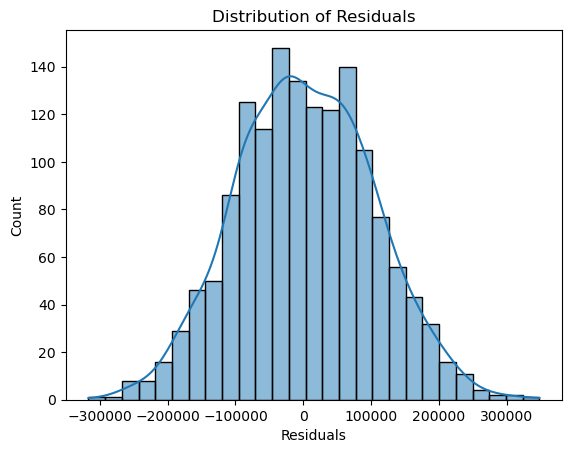

In [17]:
# Plot Residuals
residuals = y_test - predictions
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

---

## Conclusion

The **Linear Regression** model shows an **R-squared** of 0.91, meaning it explains 91% of the variance in house prices. The **RMSE** of 100,341 indicates that the average prediction error is within a reasonable range compared to the average house price in the dataset.

Further improvements could involve:
- Experimenting with additional features.
- Trying different regression models or regularization techniques.